Extracting MNIST-data\train-images-idx3-ubyte.gz


Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_train_distribute': None, '_evaluation_master': '', '_model_dir': '/tmp/mnist_convnet_model', '_tf_random_seed': None, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C9C775F8>, '_save_checkpoints_steps': None, '_global_id_in_cluster': 0, '_save_checkpoints_secs': 600, '_task_type': 'worker', '_device_fn': None, '_service': None, '_master': '', '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_num_worker_replicas': 1, '_task_id': 0, '_is_chief': True, '_num_ps_replicas': 0}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-30989


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 30989 into /tmp/mnist_convnet_model\model.ckpt.


INFO:tensorflow:probabilities = [[0.00007311 0.00000016 0.00000398 0.0000136  0.00000013 0.9998658
  0.00003569 0.00000002 0.00000687 0.00000069]
 [0.00012964 0.00005347 0.00004398 0.9388621  0.00000061 0.0159677
  0.00000044 0.0000045  0.00612267 0.03881497]
 [0.00000041 0.00000194 0.00006845 0.00000036 0.0000255  0.00000976
  0.99988043 0.00000001 0.00001309 0.00000002]
 [0.00001361 0.00000019 0.99972945 0.00023275 0.00000034 0.00000011
  0.00000002 0.00000335 0.00001934 0.00000086]
 [0.01282308 0.00403647 0.18822867 0.08937486 0.00028661 0.01264495
  0.00065588 0.39465806 0.26832035 0.028971  ]
 [0.00000314 0.00000129 0.04721895 0.19410183 0.         0.00000012
  0.         0.7584139  0.00018421 0.00007657]
 [0.00000548 0.00015103 0.00065539 0.02022889 0.00018726 0.00004919
  0.00010144 0.00001248 0.97660416 0.00200463]
 [0.00001839 0.00000617 0.00021119 0.00000078 0.5254746  0.00005489
  0.47418106 0.00000054 0.00000458 0.00004784]
 [0.00000295 0.00000123 0.00004306 0.00132624 0.00

INFO:tensorflow:loss = 0.10592115, step = 30990


INFO:tensorflow:Saving checkpoints for 30999 into /tmp/mnist_convnet_model\model.ckpt.


INFO:tensorflow:Loss for final step: 0.052166242.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-03-24-00:41:25


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-30999


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-03-24-00:41:33


INFO:tensorflow:Saving dict for global step 30999: accuracy = 0.9778, global_step = 30999, loss = 0.072215565


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 30999: /tmp/mnist_convnet_model\model.ckpt-30999


{'global_step': 30999, 'accuracy': 0.9778, 'loss': 0.072215565}
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-30999


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


2599
The prediction is:  1
Extracting MNIST-data\train-images-idx3-ubyte.gz


Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


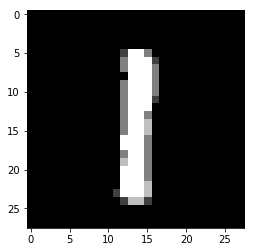

SystemExit: 

TypeError: 'level' is an invalid keyword argument for this function

In [3]:
#imports and startup
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import random

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.logging.set_verbosity(tf.logging.INFO)

for x in range (1):
    num_number = random.randint(1, 5000)


def cnn_model_fn(features, labels, mode):
    input_layer=tf.reshape(features["x"], [-1, 28, 28, 1])

    conv1=tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu
    )

    pool1=tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    conv2=tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu
    )
    pool2=tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    pool2_flat=tf.reshape(pool2, [-1, 7*7*64])

    dense=tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

    dropout=tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN
    )
    logits=tf.layers.dense(inputs=dropout, units=10)

    tf.argmax(input=logits, axis=1)
    tf.nn.softmax(logits, name="softmax_tensor")
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    loss=tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op=optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step()
        )
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)





def imageshow():
    mnist = tf.contrib.learn.datasets.load_dataset("mnist")
    first_image = mnist.test.images[num_number]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()


def main(unused_argv):
    mnist=tf.contrib.learn.datasets.load_dataset("mnist")
    #importing MNIST images
    train_data=mnist.train.images
    train_labels=np.asarray(mnist.train.labels, dtype=np.int32)
    eval_data=mnist.test.images
    eval_labels=np.asarray(mnist.test.labels, dtype=np.int32)

    mnist_classifier=tf.estimator.Estimator(
        model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model"
    )

    tensors_to_log={"probabilities": "softmax_tensor"}
    logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

    train_input_fn=tf.estimator.inputs.numpy_input_fn(
        x={"x": train_data},
        y=train_labels,
        batch_size=100,
        num_epochs=None,
        shuffle=True
    )
    mnist_classifier.train(
        input_fn=train_input_fn,
        steps=10,
        hooks=[logging_hook]
    )
    eval_input_fn=tf.estimator.inputs.numpy_input_fn(
        x={"x": eval_data},
        y=eval_labels,
        num_epochs=1,
        shuffle=False
    )
    eval_results=mnist_classifier.evaluate(input_fn=eval_input_fn)
    print(eval_results)
    pred_input_fn = tf.estimator.inputs.numpy_input_fn(x={'x': eval_data}, shuffle=False)
    predictor = list(mnist_classifier.predict(pred_input_fn))
    predictions = predictor[num_number]['classes']
    print(num_number)
    print("The prediction is: ", predictions)
    imageshow()


if __name__ == "__main__":
    tf.app.run()
